In [1]:
import functools as ft
import itertools as it

import operator

from hasse import Hasse

# "Posets"

Data for cell complex represented as set with relation.

In [2]:
def powerset(iterable):
    s = list(iterable)
    return it.chain.from_iterable(it.combinations(s, r) for r in range(len(s)+1))

In [3]:
domain = list(powerset([1,2,3]))
domain

[(), (1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

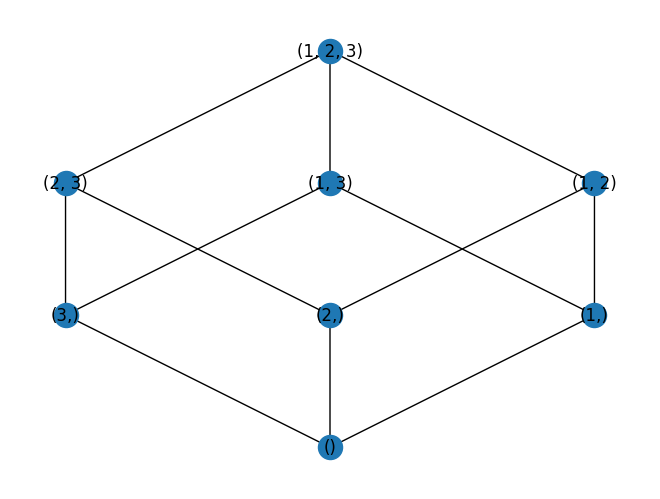

In [4]:
fn = lambda x, y: set(x) <= set(y)
Hasse(domain, fn).display()

# "Nested Lists"

Data for cell complex represented as nested list.

In [5]:
data = ((1,2),(2,3),(3,1))

In [6]:
def yield_recursive(xs):
    yield xs
    try:
        for x in xs:
            yield from yield_recursive(x)
    except:
        pass

def contains_recursive(x, xs):
    return any(map(lambda y: x == y, yield_recursive(xs)))

In [7]:
domain = set(yield_recursive(data))
domain

{((1, 2), (2, 3), (3, 1)), (1, 2), (2, 3), (3, 1), 1, 2, 3}

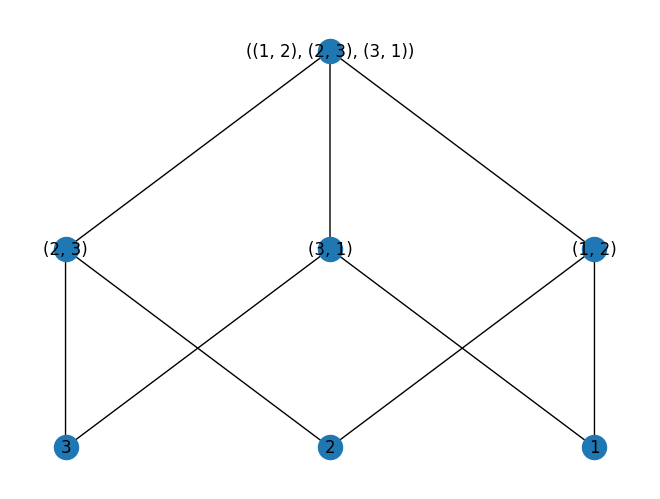

In [8]:
fn = contains_recursive
Hasse(domain, fn).display()

# "Presheaves"

Data for cell complex represented as "C-set".

In [9]:
class Presheaf(object):
    def has_span(self, i, j):
        src = lambda k: self.sources[i][k]
        tgt = lambda k: self.targets[i][k]
        dij = (j-i == 1)
        return lambda s, t: dij and any(map(lambda k: src(k) == s and tgt(k) == t, self.spans[i]))
    def domain(self):
        return [(i,j) for i, cell in enumerate(self.cells) for j in cell]
    def fn(self):  
        return lambda x, y: x == y or self.has_span(x[0], y[0])(x[1], y[1])

data = Presheaf()
data.cells = list(map(range, [1,3,3,1]))
data.spans = list(map(range, [3,6,3]))
data.sources = [[0,0,0],[0,0,1,1,2,2],[0,1,2]]
data.targets = [[0,1,2],[0,1,0,2,1,2],[0,0,0]]

In [10]:
domain = list(data.domain())
domain

[(0, 0), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0)]

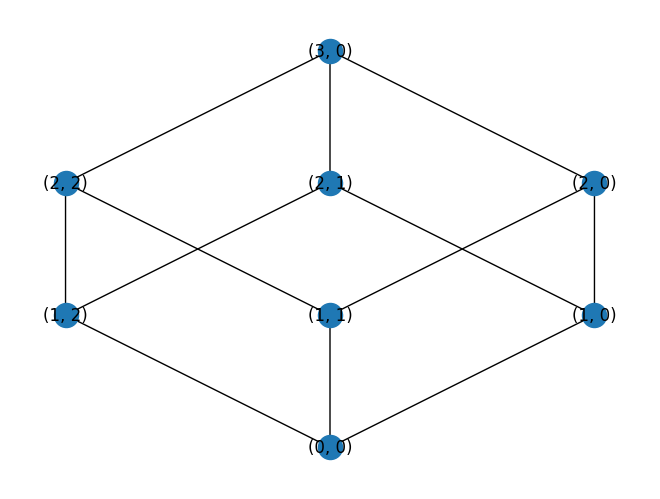

In [11]:
fn = data.fn()
Hasse(domain, fn).display()

# "Cell Tuples"

Data for cell complex represented as cell tuples/flags.

In [12]:
data = [
    (0, 0, 0),
    (1, 0, 0),
    (1, 1, 0),
    (2, 1, 0),
    (2, 2, 0),
    (0, 2, 0),
]

In [13]:
domain = sorted(set([(j, data[i][j]) for i in range(len(data)) for j in range(len(data[i]))]))
domain

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0)]

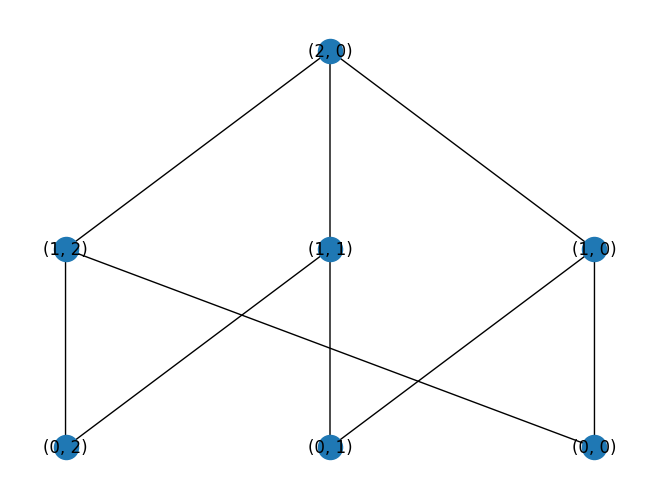

In [14]:
fn = lambda x, y: x==y or y[0]-x[0] == 1 and any(map(lambda c: c[x[0]]==x[1] and c[y[0]] ==y[1], data))
Hasse(domain, fn).display()

# "Generalized Maps"

Data for cell complex represented as generalized map/rotation system.

In [15]:
from generalized_map import GeneralizedMap, make_simplex_1, make_simplex_2, print_darts_of_cell

GMap2 = GeneralizedMap(2)

In [16]:
gm2_1 = GMap2()

make_simplex_2(gm2_1)

gm2_1.display_characteristics()
gm2_1.display_darts()

#Darts=6; #0-cells=3; #1-cells=3; #2-cells=1; ccs=1
  dart 0; fs=[1, 2, 0]
  dart 1; fs=[0, 4, 1]
  dart 2; fs=[3, 0, 2]
  dart 3; fs=[2, 5, 3]
  dart 4; fs=[5, 1, 4]
  dart 5; fs=[4, 3, 5]


In [17]:
gm2_1_counts = gm2_1.count_cells()
gm2_1_counts

[3, 3, 1, 1]

In [18]:
[list(gm2_1.darts_of_cell(0,0)(i)) for i in range(len(gm2_1.darts))]

[[0], [1], [2], [3], [4], [5]]

In [19]:
[list(gm2_1.darts_of_cell(1,1)(i)) for i in range(len(gm2_1.darts))]

[[0, 1], [1, 0], [2, 3], [3, 2], [4, 5], [5, 4]]

In [20]:
[list(gm2_1.darts_of_cell(2,2)(i)) for i in range(len(gm2_1.darts))]

[[0, 1, 4, 5, 3, 2],
 [1, 0, 2, 3, 5, 4],
 [2, 3, 5, 4, 1, 0],
 [3, 2, 0, 1, 4, 5],
 [4, 5, 3, 2, 0, 1],
 [5, 4, 1, 0, 2, 3]]

In [21]:
gm2_1 = GMap2([
    GMap2.Dart([1,5,0]),
    GMap2.Dart([0,2,1]),
    GMap2.Dart([3,1,2]),
    GMap2.Dart([2,4,3]),
    GMap2.Dart([5,3,4]),
    GMap2.Dart([4,0,5]),
])
    
gm2_1.display_characteristics()
gm2_1.display_darts()

#Darts=6; #0-cells=3; #1-cells=3; #2-cells=1; ccs=1
  dart 0; fs=[1, 5, 0]
  dart 1; fs=[0, 2, 1]
  dart 2; fs=[3, 1, 2]
  dart 3; fs=[2, 4, 3]
  dart 4; fs=[5, 3, 4]
  dart 5; fs=[4, 0, 5]


In [22]:
[list(gm2_1.darts_of_cell(0,0)(i)) for i in range(len(gm2_1.darts))]

[[0], [1], [2], [3], [4], [5]]

In [23]:
[list(gm2_1.darts_of_cell(1,1)(i)) for i in range(len(gm2_1.darts))]

[[0, 1], [1, 0], [2, 3], [3, 2], [4, 5], [5, 4]]

In [24]:
[list(gm2_1.darts_of_cell(2,2)(i)) for i in range(len(gm2_1.darts))]

[[0, 1, 2, 3, 4, 5],
 [1, 0, 5, 4, 3, 2],
 [2, 3, 4, 5, 0, 1],
 [3, 2, 1, 0, 5, 4],
 [4, 5, 0, 1, 2, 3],
 [5, 4, 3, 2, 1, 0]]